In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

%matplotlib notebook

Using TensorFlow backend.


In [2]:
df = pd.read_excel('../data/Mission2_SampleData.xlsx')
df.head()

,NCELL,NCELLGOOD,P01_TTR_RESISTIVITY,P01_WINS_PRODUCTORDER,P01_WINS_CLASS,P01_TTR_WARP,P01_TTR_AVRTHICKNESS,P01_TTR_TTV,P01_PLI_AVERAGELIFETIME,P01_PLI_DARKAREAPERCENT,P01_PLI_DEFECTAREAPERCENT,P01_PLI_DEFECTAVERAGE,P01_PLI_GRAINDEFECTAREAPERCENT,P01_PLI_EFFICIENCY,P01_PLI_RELATIVEEFFICIENCY,P01_PLI_SIGMALIFETIME
0,0.218533,G,0.68,1300806,Good,3.280955,169.492004,8.55,1.284080,15.64465,0,0,0,0,0,0.191750
1,0.218109,G,0.70,1300814,Good,10.171810,167.574997,13.79,1021.064087,0.00000,0,0,0,0,0,78.576073
2,0.219862,G,0.86,1300814,Good,9.058896,169.998993,6.97,1.280840,0.38150,0,0,0,0,0,0.121420
3,0.219451,G,0.86,1300814,Good,2.914819,170.386993,7.05,1.284770,0.27619,0,0,0,0,0,0.110580
4,0.216075,G,0.79,1300806,Good,11.976630,170.494003,6.84,1.327680,6.95399,0,0,0,0,0,0.169540


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935 entries, 0 to 7934
Data columns (total 16 columns):
NCELL                             7935 non-null float64
NCELLGOOD                         7935 non-null object
P01_TTR_RESISTIVITY               7935 non-null float64
P01_WINS_PRODUCTORDER             7935 non-null int64
P01_WINS_CLASS                    7935 non-null object
P01_TTR_WARP                      7935 non-null float64
P01_TTR_AVRTHICKNESS              7935 non-null float64
P01_TTR_TTV                       7935 non-null float64
P01_PLI_AVERAGELIFETIME           7935 non-null float64
P01_PLI_DARKAREAPERCENT           7935 non-null float64
P01_PLI_DEFECTAREAPERCENT         7935 non-null int64
P01_PLI_DEFECTAVERAGE             7935 non-null int64
P01_PLI_GRAINDEFECTAREAPERCENT    7935 non-null int64
P01_PLI_EFFICIENCY                7935 non-null int64
P01_PLI_RELATIVEEFFICIENCY        7935 non-null int64
P01_PLI_SIGMALIFETIME             7935 non-null float64
dtypes: flo

In [4]:
feat1 = ['P01_PLI_DEFECTAREAPERCENT',' P01_PLI_DEFECTAVERAGE','P01_PLI_GRAINDEFECTAREAPERCENT',
         'P01_PLI_EFFICIENCY', 'P01_PLI_RELATIVEEFFICIENCY']
df.loc[:, feat1].sum(axis=0)

c:\python37\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


P01_PLI_DEFECTAREAPERCENT         0.0
 P01_PLI_DEFECTAVERAGE            0.0
P01_PLI_GRAINDEFECTAREAPERCENT    0.0
P01_PLI_EFFICIENCY                0.0
P01_PLI_RELATIVEEFFICIENCY        0.0
dtype: float64

In [5]:
# Drop the unncessary columns
df = df.drop(columns=['P01_PLI_DEFECTAREAPERCENT','P01_PLI_DEFECTAVERAGE',
                     'P01_PLI_GRAINDEFECTAREAPERCENT','P01_PLI_EFFICIENCY',
                     'P01_PLI_RELATIVEEFFICIENCY'], axis=1)
df.head()

,NCELL,NCELLGOOD,P01_TTR_RESISTIVITY,P01_WINS_PRODUCTORDER,P01_WINS_CLASS,P01_TTR_WARP,P01_TTR_AVRTHICKNESS,P01_TTR_TTV,P01_PLI_AVERAGELIFETIME,P01_PLI_DARKAREAPERCENT,P01_PLI_SIGMALIFETIME
0,0.218533,G,0.68,1300806,Good,3.280955,169.492004,8.55,1.284080,15.64465,0.191750
1,0.218109,G,0.70,1300814,Good,10.171810,167.574997,13.79,1021.064087,0.00000,78.576073
2,0.219862,G,0.86,1300814,Good,9.058896,169.998993,6.97,1.280840,0.38150,0.121420
3,0.219451,G,0.86,1300814,Good,2.914819,170.386993,7.05,1.284770,0.27619,0.110580
4,0.216075,G,0.79,1300806,Good,11.976630,170.494003,6.84,1.327680,6.95399,0.169540


In [6]:
df['NCELLGOOD'].unique()

array(['G'], dtype=object)

In [7]:
df['P01_WINS_PRODUCTORDER'].unique()

array([1300806, 1300814, 1300753, 1300747, 1300708, 1300314, 1300778,
       1300773, 1300771, 1300785, 1300777], dtype=int64)

In [8]:
df['P01_WINS_CLASS'].unique()

array(['Good'], dtype=object)

In [9]:
df = df.drop(columns=['NCELLGOOD', 'P01_WINS_CLASS'], axis=1)

<IPython.core.display.Javascript object>


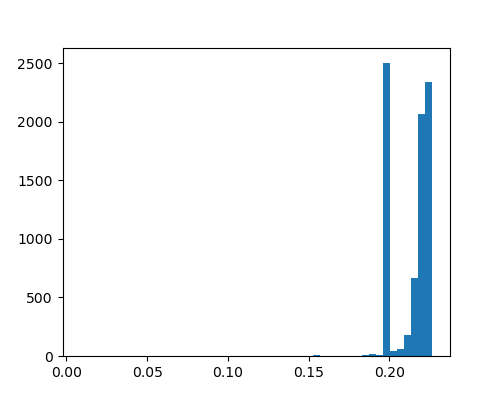

In [10]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)

ax.hist(df['NCELL'], bins = 50)
plt.show()

In [11]:
#df['NCELL2'] = df['NCELL'] * 100
df.loc[df['NCELL'] < 0.2, 'NCELL_GRADE'] = 0
df.loc[(df['NCELL'] >= 0.2) & (df['NCELL'] < 0.22), 'NCELL_GRADE'] = 1
df.loc[df['NCELL'] > 0.22, 'NCELL_GRADE'] = 2

In [12]:
df.head()

,NCELL,P01_TTR_RESISTIVITY,P01_WINS_PRODUCTORDER,P01_TTR_WARP,P01_TTR_AVRTHICKNESS,P01_TTR_TTV,P01_PLI_AVERAGELIFETIME,P01_PLI_DARKAREAPERCENT,P01_PLI_SIGMALIFETIME,NCELL_GRADE
0,0.218533,0.68,1300806,3.280955,169.492004,8.55,1.284080,15.64465,0.191750,1.0
1,0.218109,0.70,1300814,10.171810,167.574997,13.79,1021.064087,0.00000,78.576073,1.0
2,0.219862,0.86,1300814,9.058896,169.998993,6.97,1.280840,0.38150,0.121420,1.0
3,0.219451,0.86,1300814,2.914819,170.386993,7.05,1.284770,0.27619,0.110580,1.0
4,0.216075,0.79,1300806,11.976630,170.494003,6.84,1.327680,6.95399,0.169540,1.0


In [13]:
X = df.drop(columns=['NCELL', 'NCELL_GRADE'], axis=1)
y = df.loc[:, 'NCELL_GRADE']

scaler = MinMaxScaler()
X_cate = X.loc[:, 'P01_WINS_PRODUCTORDER']
X_con = X.drop(columns=['P01_WINS_PRODUCTORDER'], axis=1)
X_con_scaled = scaler.fit_transform(X_con)

X_scaled = pd.DataFrame(X_con_scaled, columns=X_con.columns.tolist())
X_scaled.loc[:, 'P01_WINS_PRODUCTORDER'] = X_cate
X_scaled.head()

,P01_TTR_RESISTIVITY,P01_TTR_WARP,P01_TTR_AVRTHICKNESS,P01_TTR_TTV,P01_PLI_AVERAGELIFETIME,P01_PLI_DARKAREAPERCENT,P01_PLI_SIGMALIFETIME,P01_WINS_PRODUCTORDER
0,0.223881,0.024591,0.314707,0.125282,0.000223,0.156453,0.000434,1300806
1,0.253731,0.078294,0.244417,0.272804,0.362001,0.000000,0.201903,1300814
2,0.492537,0.069621,0.333296,0.080800,0.000222,0.003815,0.000254,1300814
3,0.492537,0.021738,0.347523,0.083052,0.000223,0.002762,0.000226,1300814
4,0.388060,0.092360,0.351447,0.077140,0.000239,0.069543,0.000377,1300806


In [14]:
X_scaled['P01_WINS_PRODUCTORDER'] = pd.Categorical(X_scaled['P01_WINS_PRODUCTORDER'])
X_cate_encoded = pd.get_dummies(X_scaled['P01_WINS_PRODUCTORDER'], prefix='P01_WINS_PRODUCTORDER')

X_scaled = pd.concat([X_scaled, X_cate_encoded], axis=1)
X_scaled = X_scaled.drop(['P01_WINS_PRODUCTORDER'], axis=1)
X_scaled.head()

,P01_TTR_RESISTIVITY,P01_TTR_WARP,P01_TTR_AVRTHICKNESS,P01_TTR_TTV,P01_PLI_AVERAGELIFETIME,P01_PLI_DARKAREAPERCENT,P01_PLI_SIGMALIFETIME,P01_WINS_PRODUCTORDER_1300314,P01_WINS_PRODUCTORDER_1300708,P01_WINS_PRODUCTORDER_1300747,P01_WINS_PRODUCTORDER_1300753,P01_WINS_PRODUCTORDER_1300771,P01_WINS_PRODUCTORDER_1300773,P01_WINS_PRODUCTORDER_1300777,P01_WINS_PRODUCTORDER_1300778,P01_WINS_PRODUCTORDER_1300785,P01_WINS_PRODUCTORDER_1300806,P01_WINS_PRODUCTORDER_1300814
0,0.223881,0.024591,0.314707,0.125282,0.000223,0.156453,0.000434,0,0,0,0,0,0,0,0,0,1,0
1,0.253731,0.078294,0.244417,0.272804,0.362001,0.000000,0.201903,0,0,0,0,0,0,0,0,0,0,1
2,0.492537,0.069621,0.333296,0.080800,0.000222,0.003815,0.000254,0,0,0,0,0,0,0,0,0,0,1
3,0.492537,0.021738,0.347523,0.083052,0.000223,0.002762,0.000226,0,0,0,0,0,0,0,0,0,0,1
4,0.388060,0.092360,0.351447,0.077140,0.000239,0.069543,0.000377,0,0,0,0,0,0,0,0,0,1,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2020)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6348, 18), (1587, 18), (6348,), (1587,))

In [17]:
# One-hot Encoding
y_train_encoded = to_categorical(y_train, 3)
y_test_encoded = to_categorical(y_test, 3)

### Model 1

In [42]:
# MLP Model

n_col = X_train.shape[1]

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(n_col, )),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=100, verbose=False, batch_size=64)

train_loss, train_acc = model.evaluate(X_train, y_train_encoded, verbose=2)
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)

6348/6348 - 0s - loss: 0.3057 - acc: 0.8600
1587/1587 - 0s - loss: 0.3113 - acc: 0.8553


In [19]:
pred = model.predict(X_test)
df_pred = pd.DataFrame(pred, columns=['1','2','3'])
df_pred['1'] = df_pred['1'].round(0)
df_pred['2'] = df_pred['2'].round(0)
df_pred['3'] = df_pred['3'].round(0)

df_pred['pred'] = 1 * df_pred['1'] + 2 * df_pred['2'] + 3 * df_pred['3']
df_pred.head()

,1,2,3,pred
0,0.0,0.0,1.0,3.0
1,0.0,1.0,0.0,2.0
2,0.0,0.0,1.0,3.0
3,0.0,0.0,1.0,3.0
4,0.0,0.0,1.0,3.0


In [37]:
y_test_df = pd.DataFrame(y_test.tolist(), columns=['real'])
y_test_df = y_test_df +1
y_test_df.head()

,real
0,3.0
1,2.0
2,3.0
3,3.0
4,3.0


In [38]:
df_com = pd.concat([df_pred, y_test_df], axis=1)
df_com.head()

,1,2,3,pred,real
0,0.0,0.0,1.0,3.0,3.0
1,0.0,1.0,0.0,2.0,2.0
2,0.0,0.0,1.0,3.0,3.0
3,0.0,0.0,1.0,3.0,3.0
4,0.0,0.0,1.0,3.0,3.0


In [40]:
df_com.to_csv('../result/mlp_result.csv')

### Model 2

In [44]:
# Train and Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=2020)

# One-hot Encoding
y_train2_encoded = to_categorical(y_train2, 3)
y_test2_encoded = to_categorical(y_test2, 3)

In [45]:
# MLP Model
n_col = X_train2.shape[1]

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(n_col, )),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train2, y_train2_encoded, epochs=100, verbose=False, batch_size=64)

train2_loss, train2_acc = model.evaluate(X_train2, y_train2_encoded, verbose=2)
test2_loss, test2_acc = model.evaluate(X_test2, y_test2_encoded, verbose=2)

6348/6348 - 0s - loss: 0.3123 - acc: 0.8591
1587/1587 - 0s - loss: 0.3166 - acc: 0.8568
